## Project5 - Employee performance analysis

__Objective__: The performance of various employees in an organisation varies and so is the probability of each employee getting promoted. Not getting promoted could have a direct bearing against employee attrition and hence the HR department would like to know the probablity that an employee will get promoted. <br>
    The objective of this project is to predict whether an employee will get promoted or not and also understand the factors which impact the promotion.

# About the dataset
The dataset consists of the following information of 54808 employees:
<br>__employee_id:__ Unique employee ID
<br>__department:__ Department in which the employee works
<br>__region:__ Employee region
<br>__education:__ Education level of the employee
<br>__gender:__ Gender of the employee
<br>__recruitment_channel:__ Channel through which employee was recruited
<br>__no_of_trainings:__ # of training programs the employee has undergone
<br>__age:__ Age of the employee
<br>__previous_year_rating:__ Performance rating of the employee in the previous year
<br>__length_of_service:__ Experience of the employee
<br>__KPIs_met >80%:__ Has the employee met more than 80% of the KPIs. 0-No;1-Yes
<br>__awards_won:__ Has the employee won any awards? 0-No;1-Yes
<br>__avg_training_score:__ Average training score of the employee
<br>__is_promoted:__ Y variable - 0-Not promoted; 1-Promoted


## Project instructions
1.	Perform the required data pre-processing to treat for missing values and outliers
2.	Perform exploratory data analysis to visualise the spread of each of the X variables and the relationship between the various X variables and the Y variable
3.	Use the data provided to create employee segments using clustering and visually explore the % of employees promoted in each segment.
4. Divide the given data into train and test sets
5.	Build a model to predict whether an employee will get promoted or not
6.	Evaluate the model based on model performance measures for classification and recommend the most suitable model.
7.	Come up with recommendations / actionable insights based on feature importance scores derived from the model.

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [2]:
employee = pd.read_csv('employee.csv')
employee.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won,avg_training_score,is_promoted
0,65438,SalesMarketing,region_7,Masters,f,sourcing,1,35,5,8,1,0,49,0
1,65141,Operations,region_22,Bachelors,m,other,1,30,5,4,0,0,60,0
2,7513,SalesMarketing,region_19,Bachelors,m,sourcing,1,34,3,7,0,0,50,0
3,2542,SalesMarketing,region_23,Bachelors,m,other,2,39,1,10,0,0,50,0
4,48945,Technology,region_26,Bachelors,m,other,1,45,3,2,0,0,73,0


In [3]:
employee.shape

(54808, 14)

In [4]:
employee.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

In [5]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               54808 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    54808 non-null int64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won              54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: int64(9), object(5)
memory usage: 5.9+ MB


The columns like `no_of_trainings, previous_year_rating , KPIs_met >80% , awards_won` are actualy categorical but given in the interger format ,so these columns need to be converted as objects.

### Converting numerical data into categorical

In [6]:
list_int_obj = ['no_of_trainings','previous_year_rating','KPIs_met >80%','awards_won']
for col in list_int_obj:
    employee[col] = employee[col].apply(lambda x: str(x))

In [7]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               54808 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null object
age                     54808 non-null int64
previous_year_rating    54808 non-null object
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null object
awards_won              54808 non-null object
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: int64(5), object(9)
memory usage: 5.9+ MB


### Five point summary for continuous and categorical data

In [8]:
employee.describe()

,employee_id,age,length_of_service,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,34.803915,5.865512,63.386750,0.085170
std,22586.581449,7.660169,4.265094,13.371559,0.279137
min,1.000000,20.000000,1.000000,39.000000,0.000000
25%,19669.750000,29.000000,3.000000,51.000000,0.000000
50%,39225.500000,33.000000,5.000000,60.000000,0.000000
75%,58730.500000,39.000000,7.000000,76.000000,0.000000
max,78298.000000,60.000000,37.000000,99.000000,1.000000


In [9]:
employee.describe(include='object').T

,count,unique,top,freq
department,54808,9,SalesMarketing,16840
region,54808,34,region_2,12343
education,54808,4,Bachelors,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446
no_of_trainings,54808,10,1,44378
previous_year_rating,54808,6,3,18618
KPIs_met >80%,54808,2,0,35517
awards_won,54808,2,0,53538


In [10]:
len(employee.employee_id.unique())

54808

### Checking for data imbalance

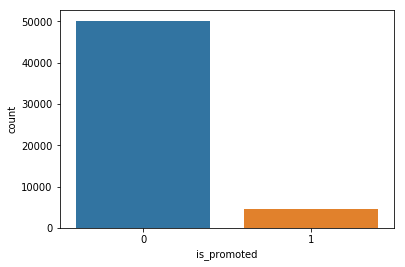

In [11]:
sns.countplot(employee['is_promoted'])
plt.show()

In [12]:
employee['is_promoted'].value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

### EDA

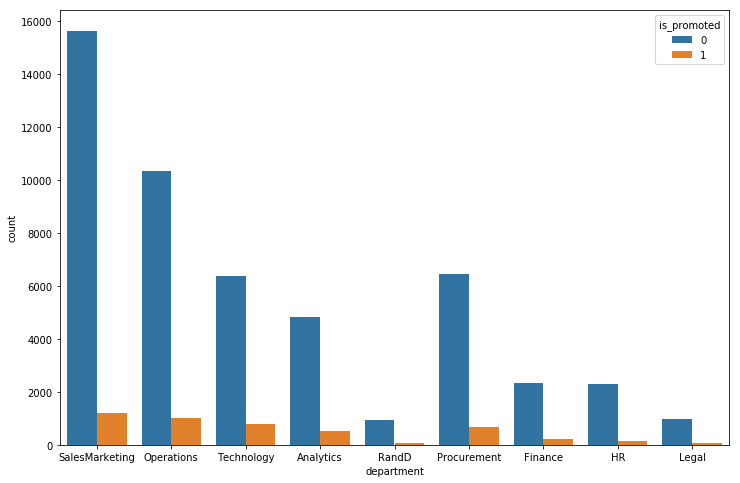

In [13]:
fig = plt.figure(figsize=(12,8))
sns.countplot(employee['department'],hue=employee['is_promoted'])
plt.show()

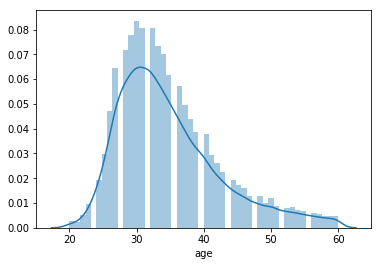

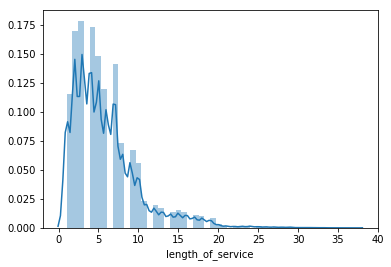

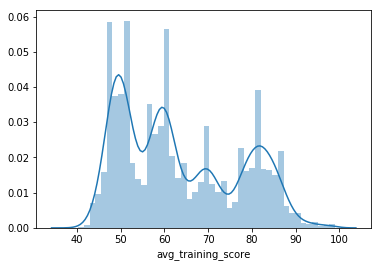

In [14]:
sns.distplot(employee['age'])
plt.show()
sns.distplot(employee['length_of_service'])
plt.show()
sns.distplot(employee['avg_training_score'])
plt.show()

### Doing T-test for continuous variables

### (I) T-test for age variable:

#### Step 1: Defining the data

In [15]:
age_promoted = employee[employee['is_promoted'] == 1]['age']
age_notpromoted = employee[employee['is_promoted'] == 0]['age']

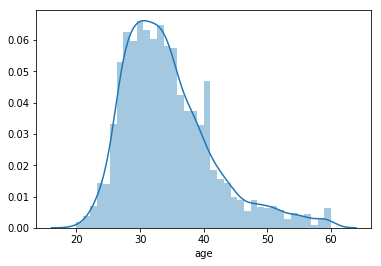

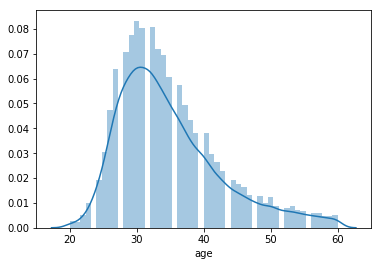

In [16]:
sns.distplot(age_promoted)
plt.show()
sns.distplot(age_notpromoted)
plt.show()

In [17]:
# For checking Normality distribution of each distribution
# Null Hypothesis: Distribution is Normal
stats.shapiro(age_promoted)

(0.9257461428642273, 3.4752201915255463e-43)

In [18]:
# For checking Normality distribution of each distribution
# Null Hypothesis: Distribution is Normal
stats.shapiro(age_notpromoted)

(0.9315153956413269, 0.0)

`Age` variable for both promoted and not promoted are not normally distribution.

#### Step 2: Define null and alternative hypotheses

In testing whether age of promoted employee and not-promoted employee are same,the null hypothesis states that mean age, $\mu{P}$ equals $\mu{NP}$. The alternative hypthesis states that the age is different for promoted employee and not-promoted employee, $\mu{P}$ $\neq$ $\mu{NP}$

* $H_0$: $\mu{P}$ - $\mu{NP}$ =      0
* $H_A$: $\mu{P}$ - $\mu{NP}$ $\neq$  0

#### Step 3: Decide the significance level

Here we select $\alpha$ = 0.05.

#### Step 4: Calculate the p - value and test statistic

** We use the scipy.stats.mannwhitneyu to calculate the two sample wilcoxcon test for the means of TWO INDEPENDENT samples of scores given the two sample observations. This function returns t statistic and two-tailed p value.**

** This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances.**

In [19]:
u, p_value = stats.mannwhitneyu(age_promoted,age_notpromoted)
print ("two-sample wilcoxon-test p-value=", p_value)

two-sample wilcoxon-test p-value= 0.005849077317965435


#### Step 5:  Decide to reject or accept null hypothesis

In this example, p value is 0.005 and it is less than 5% level of significance

So the statistical decision is to reject the null hypothesis at 5% level of significance.

#### So there is a sufficient evidence  to reject the null hypothesis that the age of promoted employee and not-promoted employee are same.

### (II) T-test for length_of_service variable:

#### Step 1: Defining the data

In [20]:
length_of_service_promoted = employee[employee['is_promoted'] == 1]['length_of_service']
length_of_service_notpromoted = employee[employee['is_promoted'] == 0]['length_of_service']

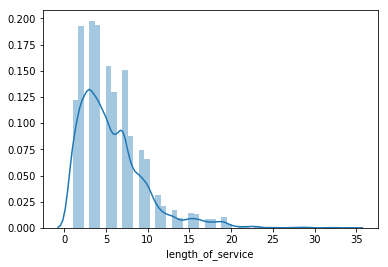

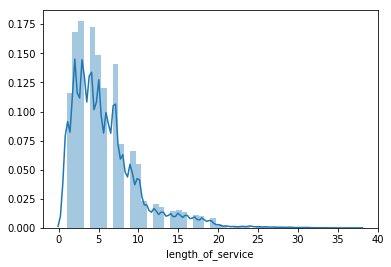

In [21]:
sns.distplot(length_of_service_promoted)
plt.show()
sns.distplot(length_of_service_notpromoted)
plt.show()

In [22]:
# For checking Normality distribution of each distribution
# Null Hypothesis: Distribution is Normal
stats.shapiro(length_of_service_promoted)

(0.8679336309432983, 0.0)

In [23]:
# For checking Normality distribution of each distribution
# Null Hypothesis: Distribution is Normal
stats.shapiro(length_of_service_notpromoted)

(0.8533936738967896, 0.0)

`Length of service` variable for both promoted and not-promoted is not normally dstributed.

#### Step 2: Define null and alternative hypotheses

In testing whether length_of_service of promoted employee and not-promoted employee are same,the null hypothesis states that mean length_of_service, $\mu{P}$ equals $\mu{NP}$. The alternative hypthesis states that the length_of_service is different for promoted employee and not-promoted employee, $\mu{P}$ $\neq$ $\mu{NP}$

* $H_0$: $\mu{P}$ - $\mu{NP}$ =      0
* $H_A$: $\mu{P}$ - $\mu{NP}$ $\neq$  0

#### Step 3: Decide the significance level

Here we select $\alpha$ = 0.05.

#### Step 4: Calculate the p - value and test statistic

** We use the scipy.stats.mannwhitneyu to calculate the two sample wilcoxcon test for the means of TWO INDEPENDENT samples of scores given the two sample observations. This function returns t statistic and two-tailed p value.**

** This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances.**

In [24]:
u, p_value = stats.mannwhitneyu(length_of_service_promoted,length_of_service_notpromoted)
print ("two-sample wilcoxon-test p-value=", p_value)

two-sample wilcoxon-test p-value= 0.11906605474602755


#### Step 5:  Decide to reject or accept null hypothesis

In this example, p value is 0.11 and it is more than 5% level of significance

So the statistical decision is to accept the null hypothesis at 5% level of significance.

#### So there is no sufficient evidence  to reject the null hypothesis that the length_of_service of promoted employee and not-promoted employee are same.

### (III) T-test for avg_training_score variable:

#### Step 1: Definig the data

In [25]:
avg_training_score_promoted = employee[employee['is_promoted'] == 1]['avg_training_score']
avg_training_score_notpromoted = employee[employee['is_promoted'] == 0]['avg_training_score']

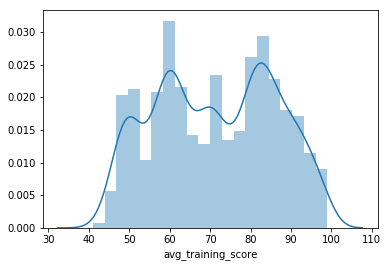

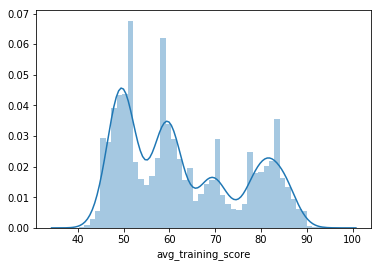

In [26]:
sns.distplot(avg_training_score_promoted)
plt.show()
sns.distplot(avg_training_score_notpromoted)
plt.show()

In [27]:
# For checking Normality distribution of each distribution
# Null Hypothesis: Distribution is Normal
stats.shapiro(avg_training_score_promoted)

(0.9609349966049194, 1.0201833535813428e-33)

In [28]:
# For checking Normality distribution of each distribution
# Null Hypothesis: Distribution is Normal
stats.shapiro(avg_training_score_notpromoted)

(0.920185387134552, 0.0)

`Avg training score` variable for both promoted and not promoted is not normally distributed.

#### Step 2: Define null and alternative hypotheses

In testing whether avg_training_score of promoted employee and not-promoted employee are same,the null hypothesis states that mean avg_training_score, $\mu{P}$ equals $\mu{NP}$. The alternative hypthesis states that the avg_training_score is different for promoted employee and not-promoted employee, $\mu{P}$ $\neq$ $\mu{NP}$

* $H_0$: $\mu{P}$ - $\mu{NP}$ =      0
* $H_A$: $\mu{P}$ - $\mu{NP}$ $\neq$  0

#### Step 3: Decide the significance level

Here we select $\alpha$ = 0.05.

#### Step 4: Calculate the p - value and test statistic

** We use the scipy.stats.mannwhitneyu to calculate the two sample wilcoxcon test for the means of TWO INDEPENDENT samples of scores given the two sample observations. This function returns t statistic and two-tailed p value.**

** This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances.**

In [29]:
u, p_value = stats.mannwhitneyu(avg_training_score_promoted,avg_training_score_notpromoted)
print ("two-sample wilcoxon-test p-value=", p_value)

two-sample wilcoxon-test p-value= 0.0


#### Step 5:  Decide to reject or accept null hypothesis

In this example, p value is 0.0 and it is less than 5% level of significance

So the statistical decision is to reject the null hypothesis at 5% level of significance.

#### So there is a sufficient evidence  to reject the null hypothesis that the age of promoted employee and not-promoted employee are same.

### Covariance analysis

In [30]:
corr_matrix = employee.corr()
corr_matrix

,employee_id,age,length_of_service,avg_training_score,is_promoted
employee_id,1.000000,0.000437,0.001274,-0.000586,0.001206
age,0.000437,1.000000,0.657111,-0.048380,-0.017166
length_of_service,0.001274,0.657111,1.000000,-0.038122,-0.010670
avg_training_score,-0.000586,-0.048380,-0.038122,1.000000,0.181147
is_promoted,0.001206,-0.017166,-0.010670,0.181147,1.000000


In [31]:
promoted_df = employee[employee['is_promoted'] == 1]
promoted_df.drop('is_promoted',1,inplace=True)
promoted_corr_matrix = promoted_df.corr()
promoted_corr_matrix

,employee_id,age,length_of_service,avg_training_score
employee_id,1.000000,0.013480,-0.008551,0.011601
age,0.013480,1.000000,0.652862,-0.048902
length_of_service,-0.008551,0.652862,1.000000,-0.029786
avg_training_score,0.011601,-0.048902,-0.029786,1.000000


In [32]:
notpromoted_df = employee[employee['is_promoted'] == 0]
notpromoted_df.drop('is_promoted',1,inplace=True)
notpromoted_corr_matrix = notpromoted_df.corr()
notpromoted_corr_matrix

,employee_id,age,length_of_service,avg_training_score
employee_id,1.000000,-0.000664,0.002150,-0.002142
age,-0.000664,1.000000,0.657405,-0.045852
length_of_service,0.002150,0.657405,1.000000,-0.037555
avg_training_score,-0.002142,-0.045852,-0.037555,1.000000


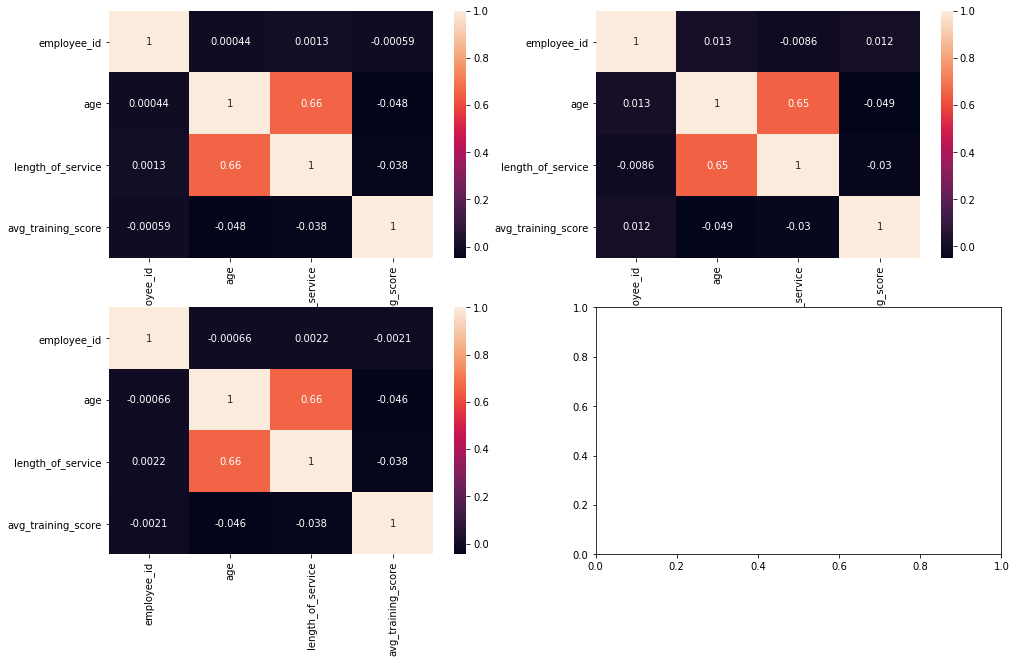

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
sns.heatmap(employee.drop('is_promoted',1).corr(),annot=True,ax=axes[0,0])
sns.heatmap(promoted_df.corr(),annot=True,ax=axes[0,1])
sns.heatmap(notpromoted_df.corr(),annot=True,ax=axes[1,0])
plt.show()